# Инжиниринг категориальных признаков
## Цель работы
Ознакомиться с основными приемами работы с категориальными атрибутами в датасетах для машинного обучения.

## Содержание работы
1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.
2. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.
3. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.
4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.
5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.
6. Заполните отсутствующие значения в датасете.
7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.
8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()


### 1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
t_data = pd.read_csv("data/titanic.csv")
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
t_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
cs_data = pd.read_csv("data/Customer_support_data.csv")
cs_data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [8]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [9]:
cs_data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### 2. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.

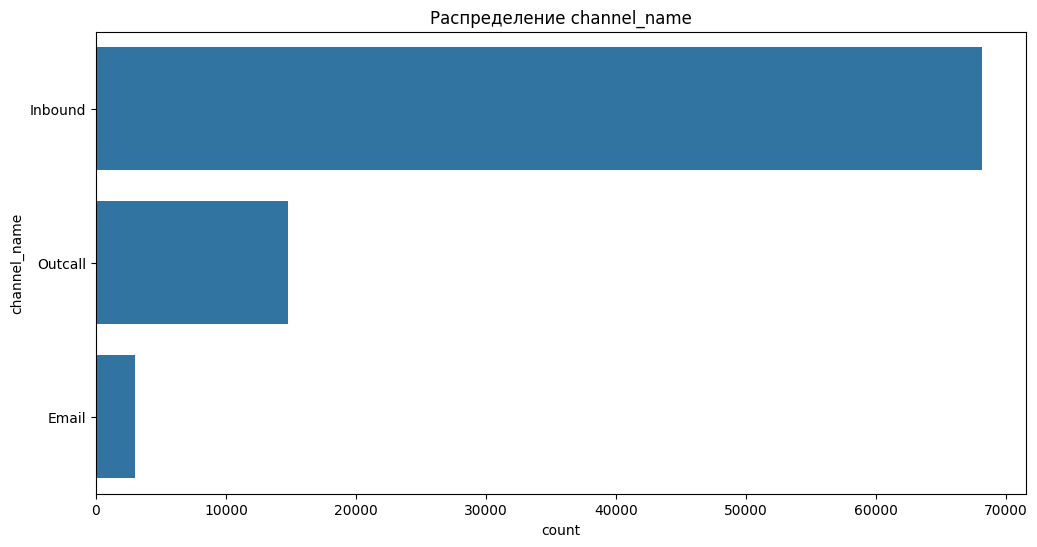

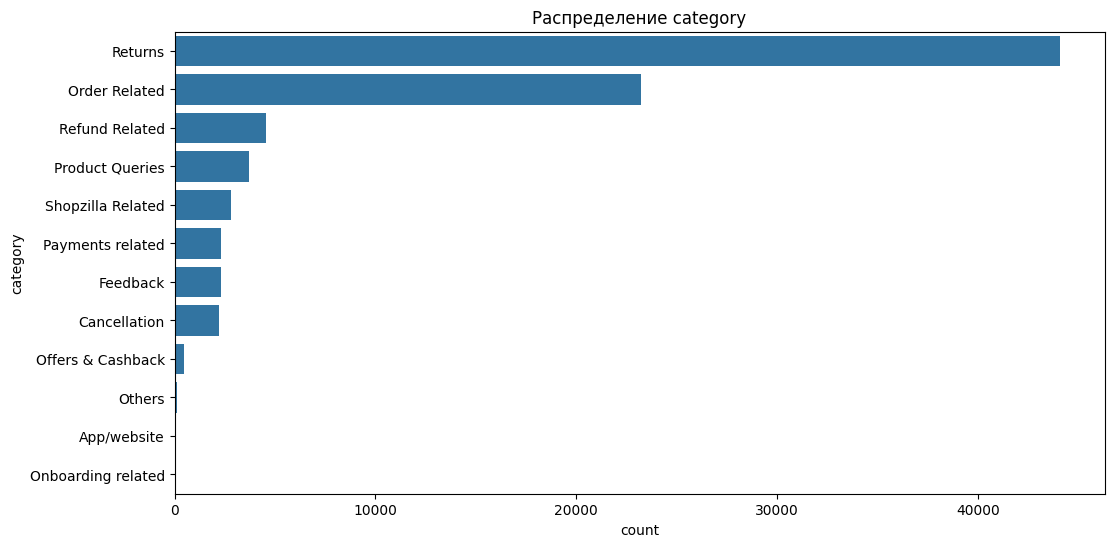

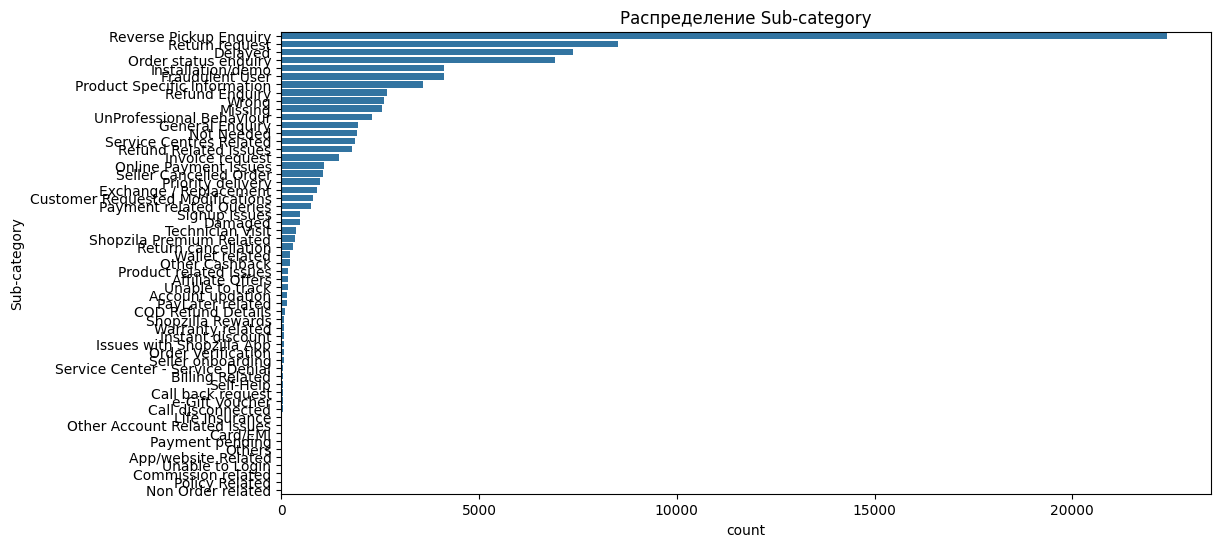

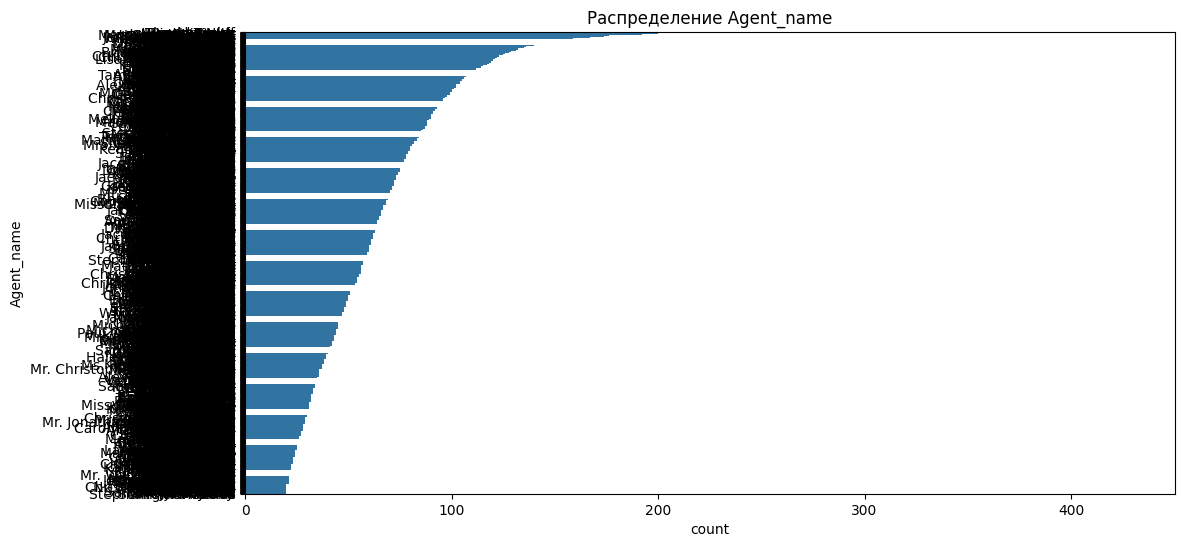

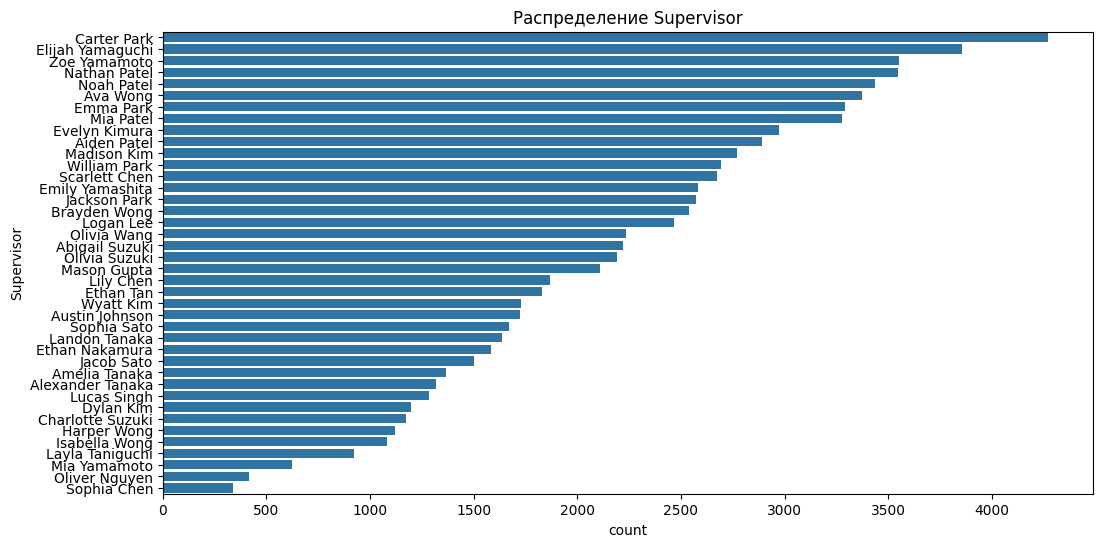

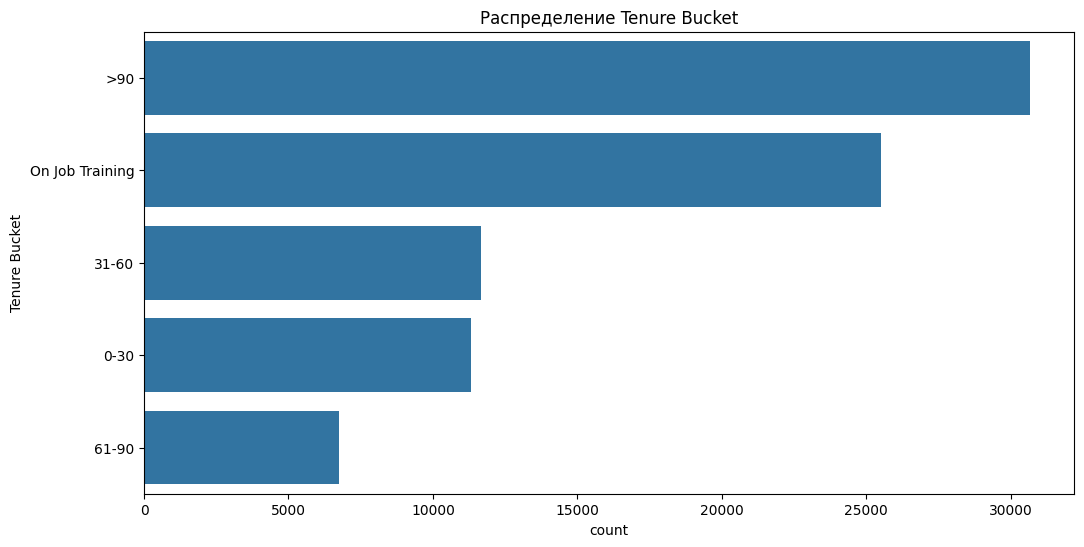

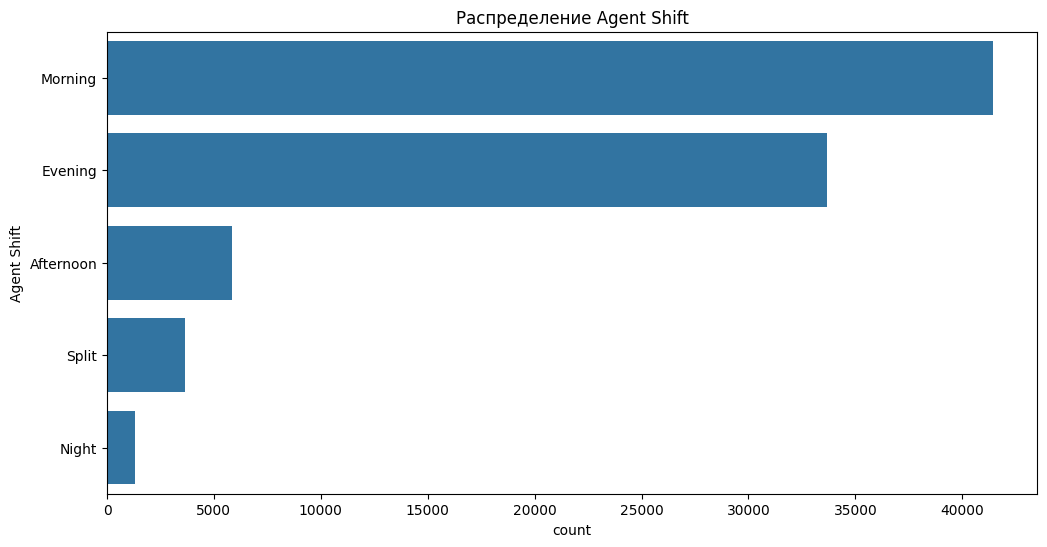

In [10]:
categorical_columns = ['channel_name', 'category', 'Sub-category',  'Agent_name', 'Supervisor', 'Tenure Bucket', 'Agent Shift']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=cs_data[col], order=cs_data[col].value_counts().index)
    plt.title(f"Распределение {col}")
    plt.show()


### 3. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.

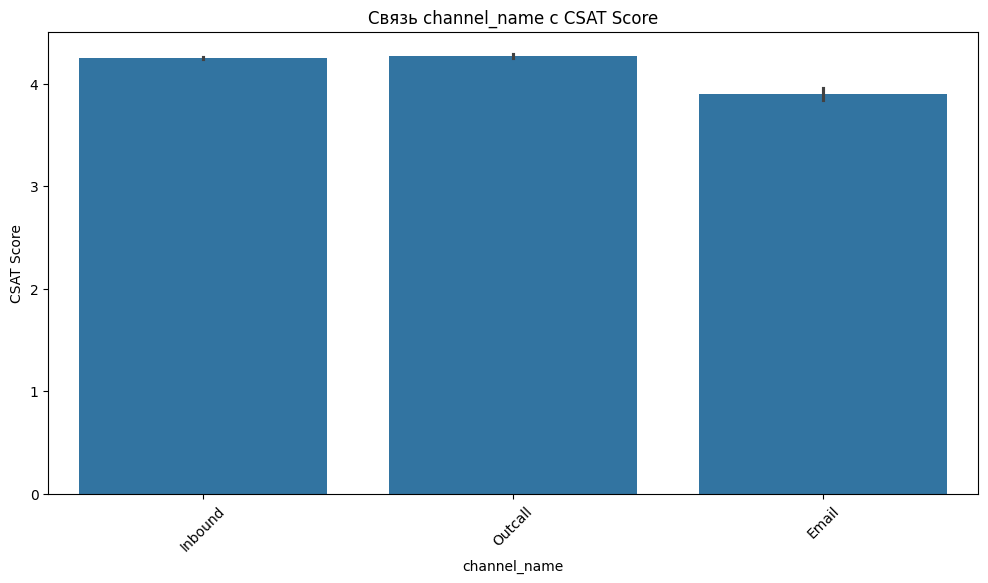

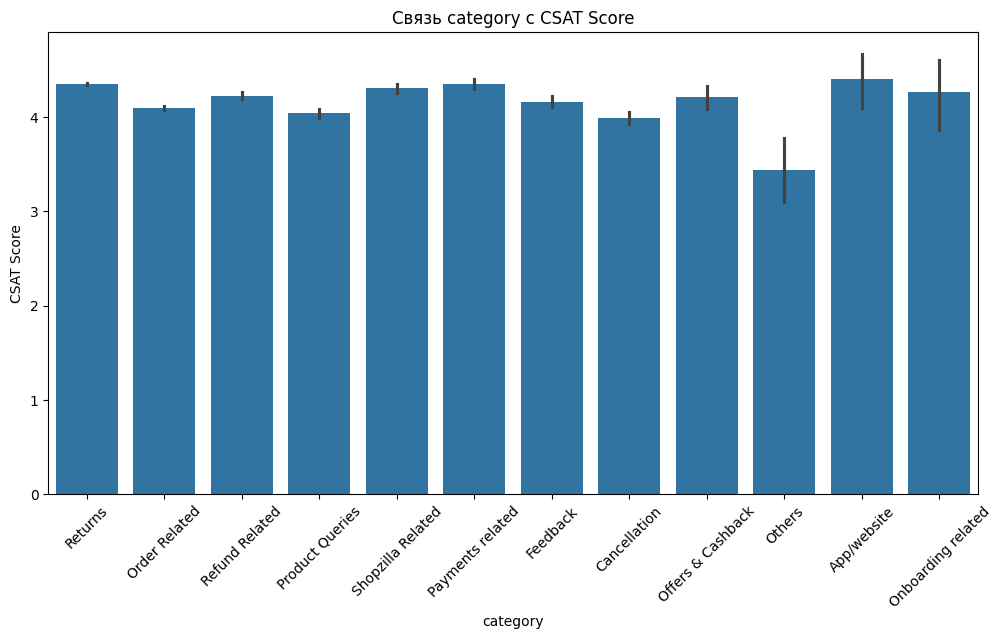

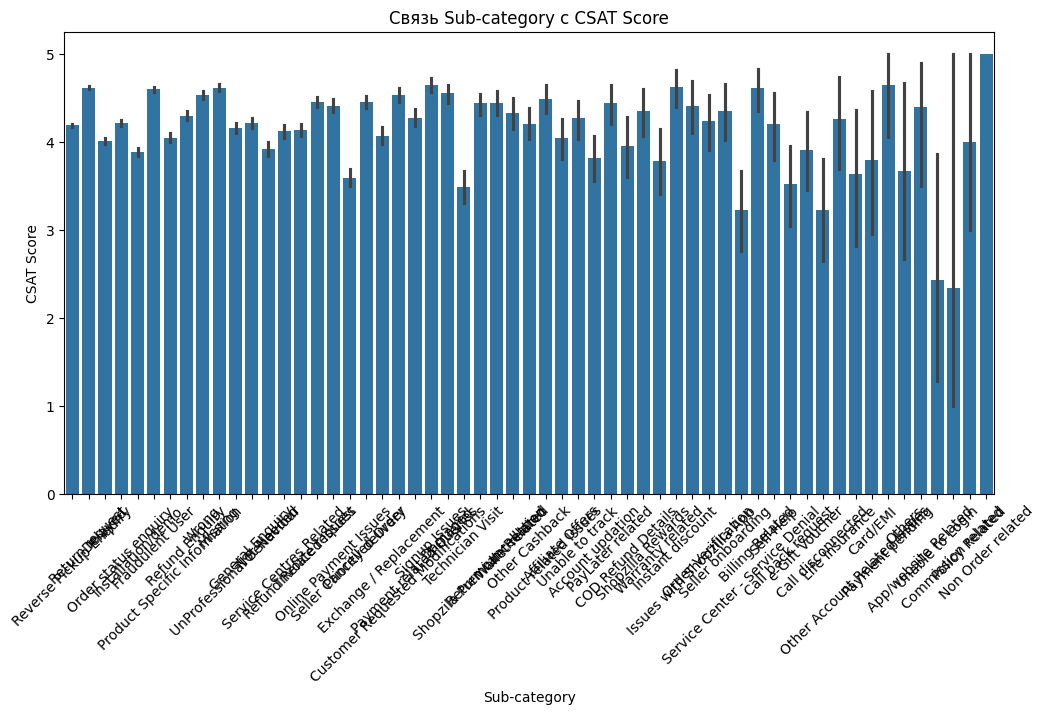

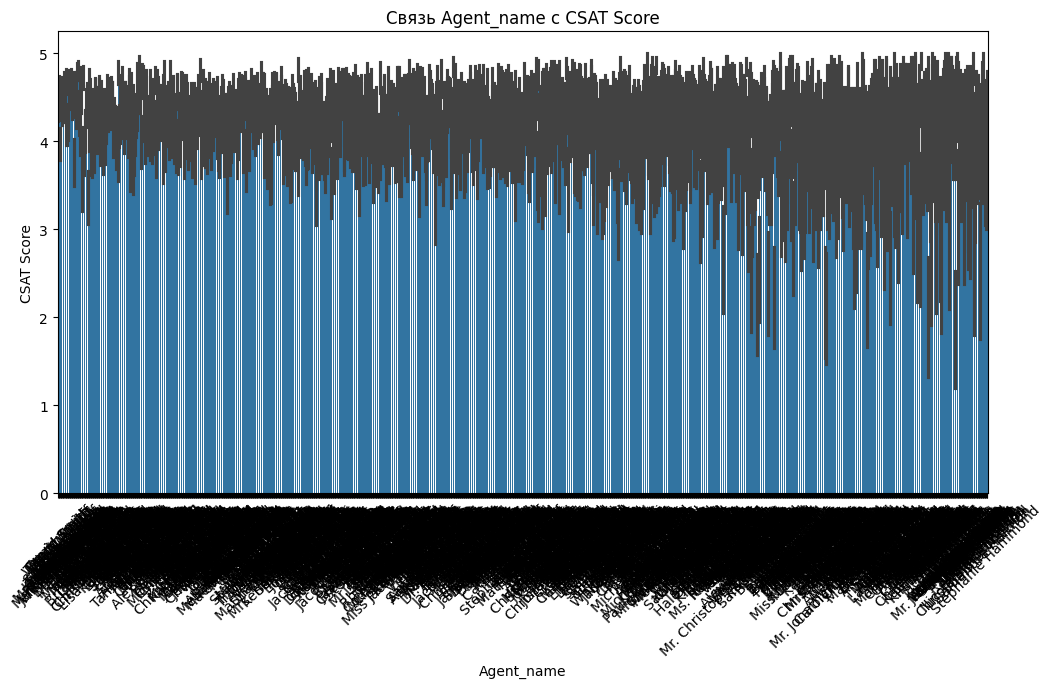

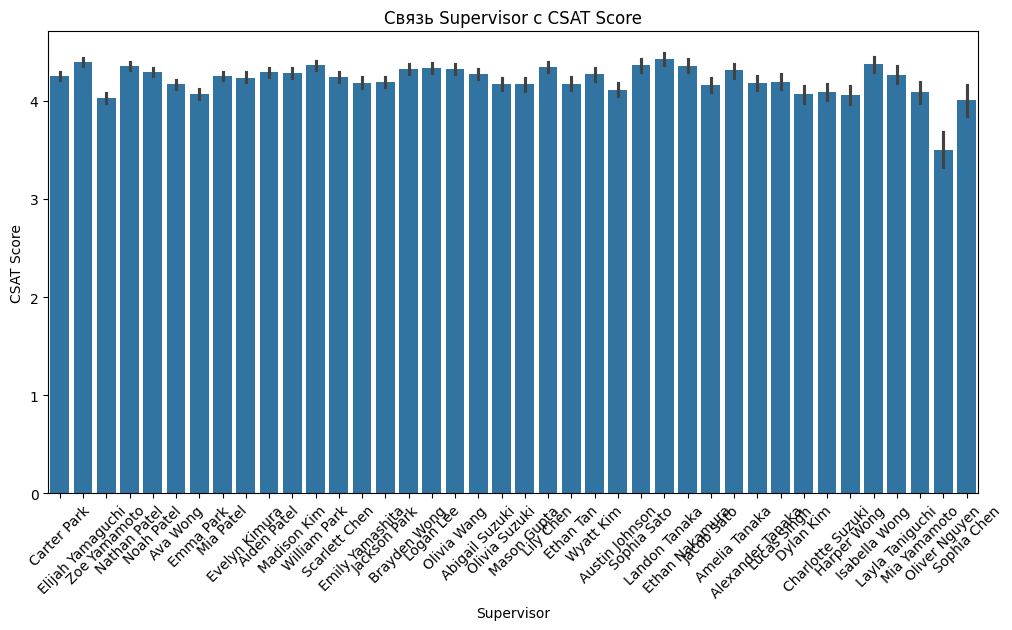

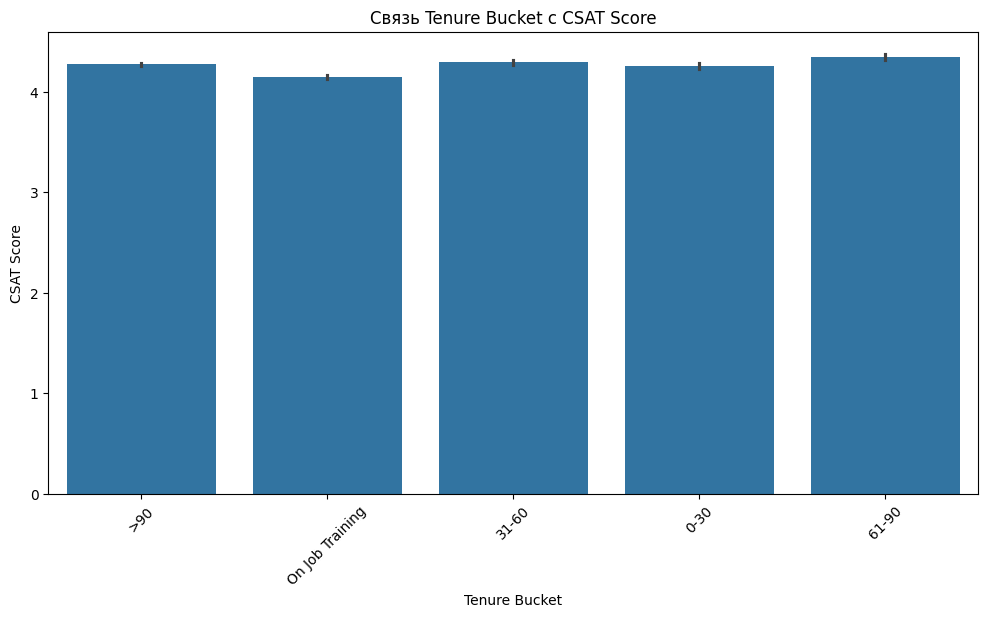

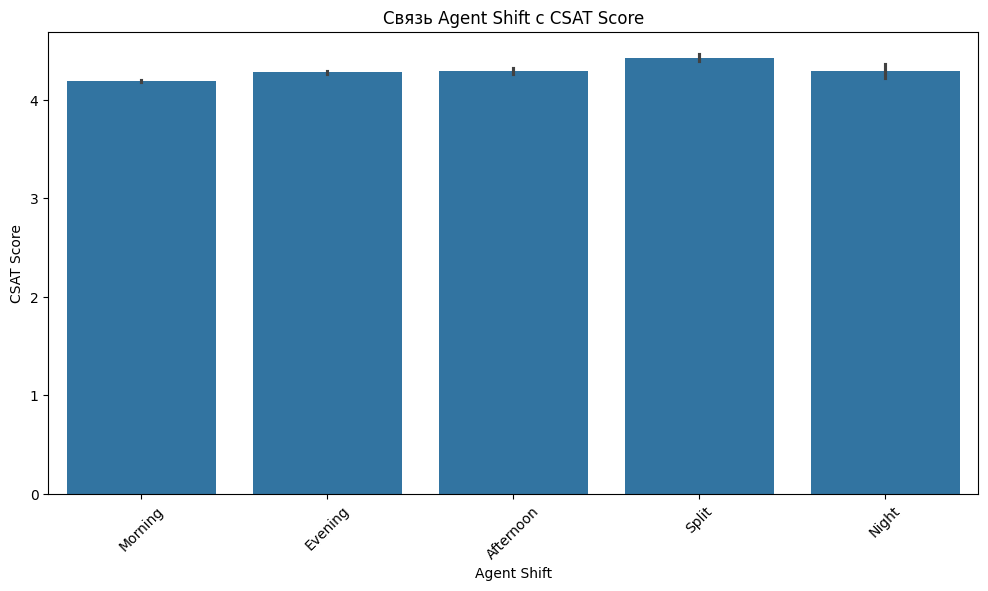

In [11]:
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cs_data[col], y=cs_data["CSAT Score"], order=cs_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Связь {col} с CSAT Score")
    plt.show()

### 4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.

In [12]:
rare_categories = cs_data["Sub-category"].value_counts()[cs_data["Sub-category"].value_counts() < 5000].index
cs_data["Sub-category"] = cs_data["Sub-category"].replace(rare_categories, "Other")

In [13]:
cs_data[['Sub-category', 'CSAT Score']]

,Sub-category,CSAT Score
0,Other,5
1,Other,5
2,Other,5
3,Reverse Pickup Enquiry,5
4,Other,5
...,...,...
85902,Other,4
85903,Other,5
85904,Order status enquiry,5
85905,Other,4


### 5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.

In [14]:
cs_data['Agent_case_count'] = cs_data.groupby("Agent_name")["Agent_name"].transform('count')

In [15]:
cs_data[['Agent_name', 'Agent_case_count']]

,Agent_name,Agent_case_count
0,Richard Buchanan,42
1,Vicki Collins,32
2,Duane Norman,35
3,Patrick Flores,48
4,Christopher Sanchez,124
...,...,...
85902,Brandon Leon,128
85903,Linda Foster,75
85904,Kimberly Martinez,31
85905,Daniel Martin,48


### 6. Заполните отсутствующие значения в датасете.

In [16]:
cs_data.fillna('Unknown', inplace=True)
t_data.fillna('Unknown', inplace=True)

C:\Users\MInKA\AppData\Local\Temp\ipykernel_4984\1414632959.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cs_data.fillna('Unknown', inplace=True)
C:\Users\MInKA\AppData\Local\Temp\ipykernel_4984\1414632959.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  t_data.fillna('Unknown', inplace=True)


In [17]:
cs_data.isna().sum()

Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
Agent_case_count           0
dtype: int64

In [18]:
t_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.

In [19]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [20]:
le = LabelEncoder()
t_data["Sex"] = le.fit_transform(t_data["Sex"])
t_data = pd.get_dummies(t_data, columns=["Embarked", "Pclass"])

In [21]:
t_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,False,False,True,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,False,False,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True,False,True,False,False
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,False,False,True,False,False,False,True


### 8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

In [22]:
cs_data.drop(["Unique id", "Order_id", "order_date_time", "issue_responded", "Issue_reported at", "Survey_response_Date"], axis=1, inplace=True)

In [23]:
cs_data.head()

,channel_name,category,Sub-category,Customer Remarks,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Agent_case_count
0,Outcall,Product Queries,Other,Unknown,Unknown,Unknown,Unknown,Unknown,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,42
1,Outcall,Product Queries,Other,Unknown,Unknown,Unknown,Unknown,Unknown,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,32
2,Inbound,Order Related,Other,Unknown,Unknown,Unknown,Unknown,Unknown,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,35
3,Inbound,Returns,Reverse Pickup Enquiry,Unknown,Unknown,Unknown,Unknown,Unknown,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,48
4,Inbound,Cancellation,Other,Unknown,Unknown,Unknown,Unknown,Unknown,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,124


In [24]:
for col in cs_data.columns:
    if "Unknown" in cs_data[col].value_counts():
        print(f"Unknown in {col}: {cs_data[col].value_counts()["Unknown"]}, {cs_data[col].value_counts()["Unknown"] / sum(cs_data[col].value_counts()) * 100}% of col")

Unknown in Customer Remarks: 57165, 66.54288940365744% of col
Unknown in Customer_City: 68828, 80.11919866832737% of col
Unknown in Product_category: 68711, 79.98300487736738% of col
Unknown in Item_price: 68701, 79.97136438241354% of col
Unknown in connected_handling_time: 85665, 99.71830002211695% of col


In [25]:
cs_data.drop(["Customer Remarks", "Customer_City", "Product_category", "Item_price", "connected_handling_time"], axis=1, inplace=True)

In [26]:
cs_data = pd.get_dummies(cs_data)

In [27]:
cs_data.head()

,CSAT Score,Agent_case_count,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,42,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5,32,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,5,35,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,5,48,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,5,124,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False


## Задания для самостоятельного выполнения

### 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

In [28]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(cs_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Корреляция признаков в Customer Support")
# plt.show()

Можно сократить еще датасет и построить хитмапу
У меня заняло огромное кол-во времени чтобы построить корр в cs_data

### 2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.
### 3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [29]:
X_train, X_test, y_train, y_test = train_test_split(cs_data.drop("CSAT Score", axis=1), cs_data["CSAT Score"], test_size=0.2, random_state=42)

In [30]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
y_pred = clf.predict(X_test)
y_pred

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred)

0.6949132813409382

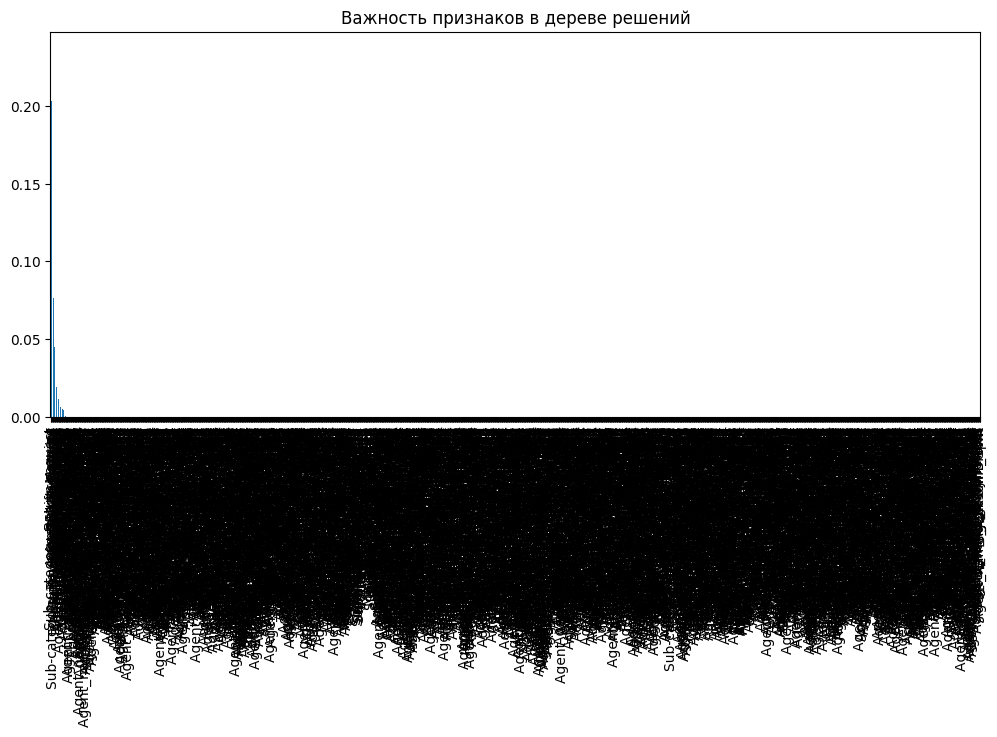

In [32]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 5))
plt.title("Важность признаков в дереве решений")
plt.show()


### 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [37]:
t_data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,False,False,True,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,False,False,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True,False,True,False,False
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,False,False,True,False,False,False,True


In [38]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    int32  
 4   Age               891 non-null    object 
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket            891 non-null    object 
 8   Fare              891 non-null    float64
 9   Cabin             891 non-null    object 
 10  Embarked_C        891 non-null    bool   
 11  Embarked_Q        891 non-null    bool   
 12  Embarked_S        891 non-null    bool   
 13  Embarked_Unknown  891 non-null    bool   
 14  Pclass_1          891 non-null    bool   
 15  Pclass_2          891 non-null    bool   
 16  Pclass_3          891 non-null    bool   
dt

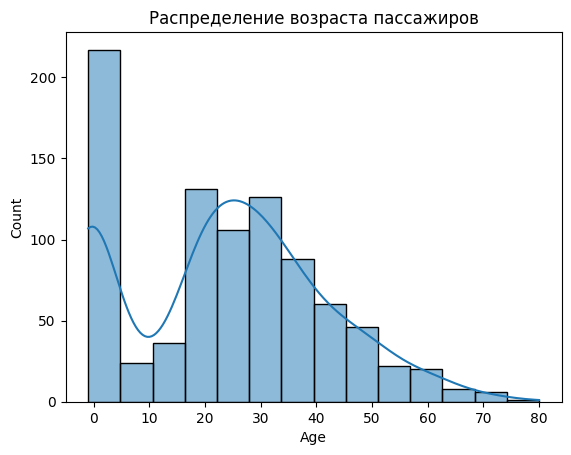

In [43]:
t_data['Age'] = t_data['Age'].replace("Unknown", 0)
sns.histplot(t_data["Age"], kde=True)
plt.title("Распределение возраста пассажиров")
plt.show()

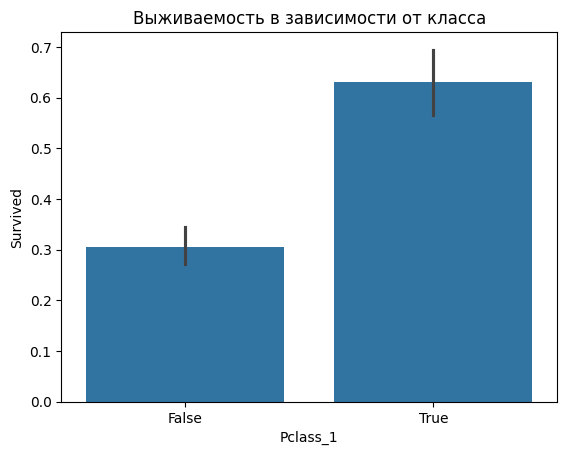

In [45]:
sns.barplot(x="Pclass_1", y="Survived", data=t_data)
plt.title("Выживаемость в зависимости от класса")
plt.show()

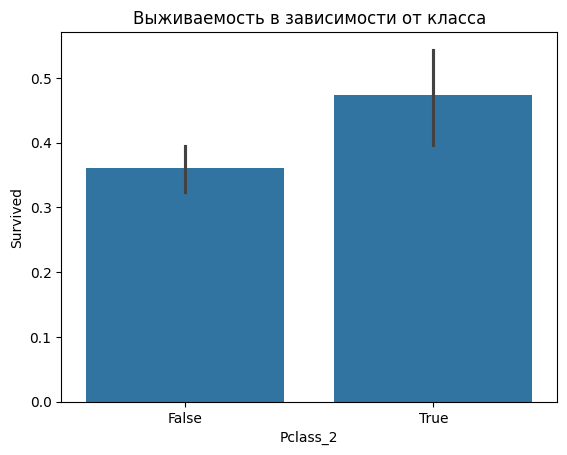

In [47]:
sns.barplot(x="Pclass_2", y="Survived", data=t_data)
plt.title("Выживаемость в зависимости от класса")
plt.show()

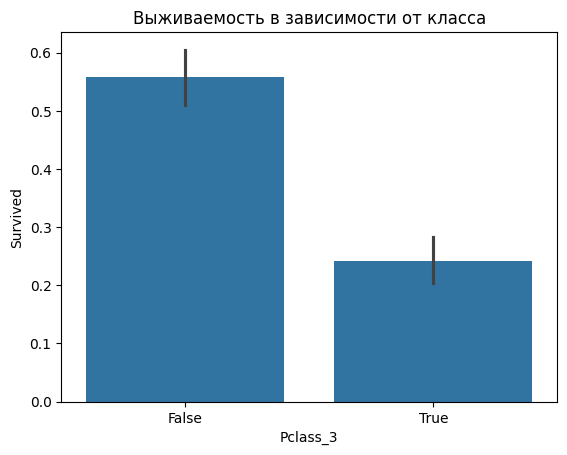

In [46]:
sns.barplot(x="Pclass_3", y="Survived", data=t_data)
plt.title("Выживаемость в зависимости от класса")
plt.show()

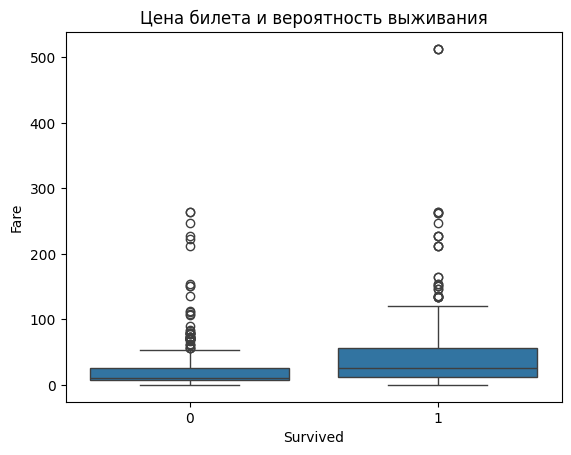

In [48]:
sns.boxplot(x="Survived", y="Fare", data=t_data)
plt.title("Цена билета и вероятность выживания")
plt.show()

### 5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

In [49]:
X_processed = cs_data.drop("CSAT Score", axis=1)
y_processed = cs_data["CSAT Score"]
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)
clf.fit(X_train_proc, y_train_proc)
y_pred_proc = clf.predict(X_test_proc)
print("Accuracy после обработки:", accuracy_score(y_test_proc, y_pred_proc))

Accuracy после обработки: 0.6949132813409382


### 6. Создайте воспроизводимый код обработки данного датасета.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def load_data(way):
    data = pd.read_csv(way)
    return data

def preprocess_customer_support(cs_data):
    cs_data.fillna('Unknown', inplace=True)
    
    cs_data["Customer_Remarks_New"] = (cs_data["Customer Remarks"].str.len() > 3).astype(int)
    cs_data["Is_order"] = cs_data["Order_id"].notna().astype(int)
    
    rare_categories = cs_data["Sub-category"].value_counts()[cs_data["Sub-category"].value_counts() < 5000].index
    cs_data["Sub-category"] = cs_data["Sub-category"].replace(rare_categories, "Other")
    
    cs_data['Agent_case_count'] = cs_data.groupby("Agent_name")["Agent_name"].transform('count')
    
    cs_data.drop(["Unique id", "Order_id", "order_date_time", "Issue_reported at", "Survey_response_Date", "Customer Remarks", "Customer_City", "Product_category", "Item_price", "connected_handling_time"], axis=1, inplace=True)
    
    cs_data = pd.get_dummies(cs_data)
    
    return cs_data

def preprocess_titanic(titanic_data):
    titanic_data.fillna('Unknown', inplace=True)

    le = LabelEncoder()
    titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])
    titanic_data = pd.get_dummies(titanic_data, columns=["Embarked", "Pclass"])
    
    return titanic_data

def main():
    cs_data, titanic_data = load_data()
    cs_data = preprocess_customer_support(cs_data)
    titanic_data = preprocess_titanic(titanic_data)
    
    print("Customer Support Data Processed:")
    print(cs_data.head())
    print("\nTitanic Data Processed:")
    print(titanic_data.head())
